In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [16]:
model = "lsa_rot_axi_30"

In [17]:
result = np.load(
            f'{model}.dat', 
            'rb', 
            allow_pickle=True
        )

In [18]:
kxs = result['kx']
kys = result['ky']
kzs = result['kz']

Oi = result['O_i']
Or = result['O_r']

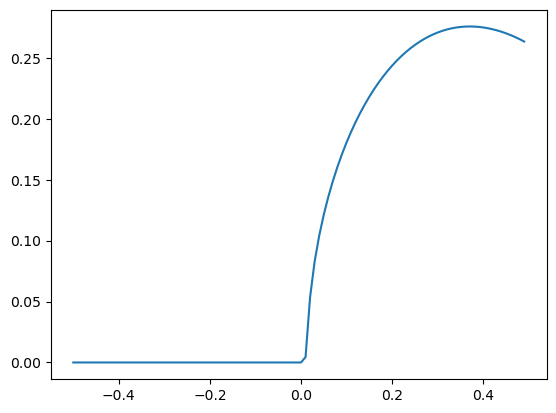

In [19]:
plt.plot(kzs, Oi[len(kys)//2, len(kxs)//2, :])
plt.show()

Image saved to plots/lsa_rot_axi_30.png


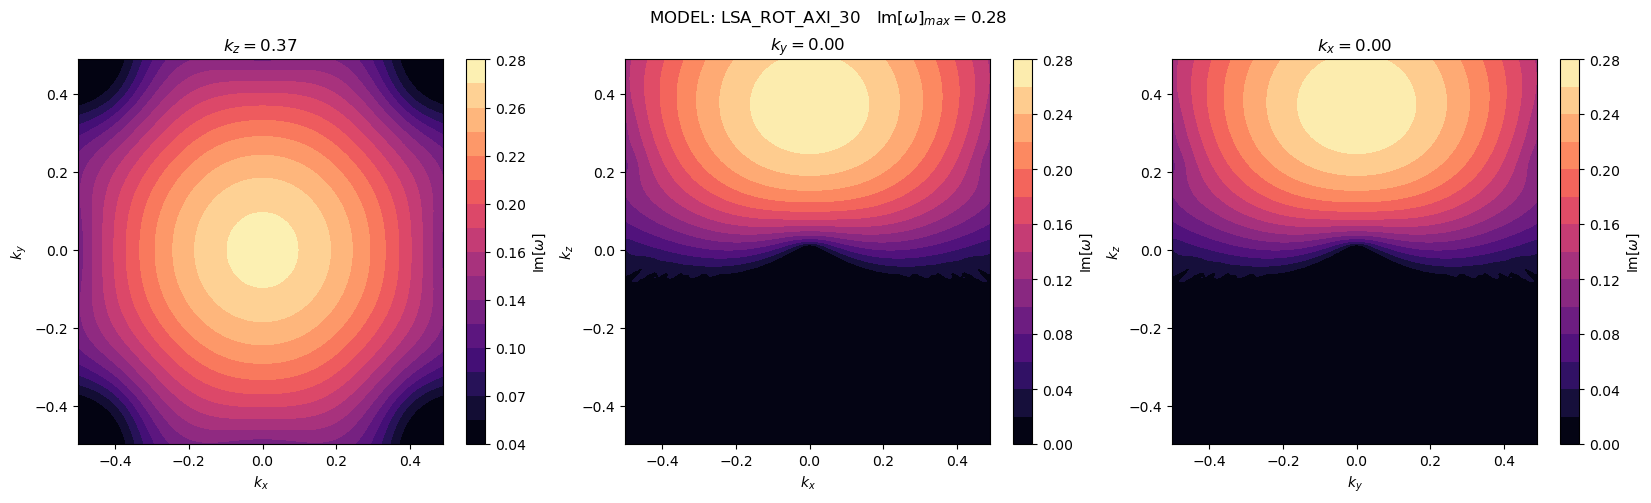

In [20]:
kx_max, ky_max, kz_max = np.where(Oi==Oi.max())
Oi_max = Oi.max()
cmap = "magma"
try:
    fig = plt.figure(figsize=(20, 5))
    axs = fig.subplots(1, 3)

    img0 = axs[0].contourf(kxs, kzs, Oi[:, : , kz_max[0]].T, levels=15, cmap=cmap)
    axs[0].set_xlabel("$k_x$")
    axs[0].set_ylabel("$k_y$")
    axs[0].set_title(f"$k_z = {kzs[kz_max[0]]:.2f}$")
    plt.colorbar(img0, ax=axs[0], format="%.2f", label=r"Im$[\omega]$")

    img1 = axs[1].contourf(kxs, kzs, Oi[:,  ky_max[0], :].T, levels=15, cmap=cmap)
    axs[1].set_xlabel("$k_x$")
    axs[1].set_ylabel("$k_z$")
    axs[1].set_title(f"$k_y = {kys[ky_max[0]]:.2f}$")
    plt.colorbar(img1, ax=axs[1], format="%.2f", label=r"Im$[\omega]$")

    img2 = axs[2].contourf(kxs, kzs, Oi[kx_max[0], :, :].T, levels=15, cmap=cmap)
    axs[2].set_xlabel("$k_y$")
    axs[2].set_ylabel("$k_z$")
    axs[2].set_title(f"$k_x = {kxs[kx_max[0]]:.2f}$")
    plt.colorbar(img2, ax=axs[2], format="%.2f", label=r"Im$[\omega]$")

    plt.suptitle (f"MODEL: {model.upper()} \t" + r"Im$[\omega]_{max} = $" + f"{Oi_max:.2f}")
    saveto = os.path.join("plots", f"{model}.png")

    plt.savefig(
        saveto,
        dpi = 150,
        bbox_inches="tight",
    )

    print(f"Image saved to {saveto}")
    plt.show()
except Exception as e:
    print(e.args)